# Business Understanding

For this lab, the team used a data set from Kaggle named: “2015 Flight Delays and Cancellations.” The data set contains 3 spreadsheets containing airport, airline, and flight information. The purpose of the data set is to provide consumers with information about the quality of services provided to them by airlines. Several attributes contained in the data set include: flight numbers, scheduled departure, departure delay, flight cancellations, and time spent in the air. For a full list of attributes in the data set, as well as their data types, please visit this site. 

This data set is meaningful as it contains decision criteria that customers evaluate when determining which airline to fly with. For example, if a customer knows that a specific airline has the most cancellations, they are likely to not fly with that airline. Similarly, if a customer knows that the overall experience provided by a specific airline is poor, they will not fly with them. Additionally, this data set is meaningful to airlines because they can use the data to identify factors that are contributing to flight delays. After identifying the factors that are influencing delays, airlines can make modifications to their operations to minimize future delays.  

For this lab, the team chose to predict flight delays and flight departure delays. To predict delays, the team created a binary attribute named “is_delay.” Seeing that the departure delay attribute is continuous, the team will predict this outcome as a regression problem. The team will evaluate the effectiveness of the regression algorithm with tenfold cross validation and by the model’s, R^2, MSE. Conversely the “is_delay” attribute is categorical and will be evaluated as classification problem. The team will evaluate the effectiveness of the classification algorithm using tenfold cross validation, model accuracy and AUC. 

## The team will know that they have mined useful knowledge from the data set if they are able to: 
#### 1. Identify related attributes and trends that exist in the data set.  
#### 2. Determine which variables are correlated with one another.   
#### 3. Create a prediction algorithm for the attributes: “departure_delay” and “is_delay”, using the effectiveness metrics of R^2 and MSE for “departure_delay” and model accuracy and AUC for “is_delay” to evaluate model performance. 

# Curating Data Sets

In this section, the team merged the three files from Kaggle to create a curated data set that was used during this lab. The three files included flight information, airport information and airline information.

In [ ]:
import pandas as pd

In [87]:
df_flights = pd.read_csv(r'/Users/allen/Desktop/MSDS/ML1/archive/flights.csv',low_memory = False)

In [88]:
df_airports = pd.read_csv(r'/Users/allen/Desktop/MSDS/ML1/archive/airports.csv',low_memory = False)

In [89]:
df_airlines = pd.read_csv(r'/Users/allen/Desktop/MSDS/ML1/archive/airlines.csv',low_memory = False)

In [5]:
pd.set_option('display.max_columns', None)

#### Determining what the data sets look like:

In [ ]:
df_airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [ ]:
df_flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [90]:
#merge flight and airline information
df_merge_airline = df_flights.merge(df_airlines, left_on = 'AIRLINE', right_on = 'IATA_CODE',how='left')
df_merge_airline.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [91]:
#find airports with missing LATITUDE
df_airports[df_airports['LATITUDE'].isna() == True]

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
96,ECP,Northwest Florida Beaches International Airport,Panama City,FL,USA,NaN,NaN
234,PBG,Plattsburgh International Airport,Plattsburgh,NY,USA,NaN,NaN
313,UST,Northeast Florida Regional Airport (St. August...,St. Augustine,FL,USA,NaN,NaN


In [93]:
#impute missing lat/long values from:https://www.airnav.com/airport/
#ECP:
#    lat:30.3582408
#    long:-85.7956022
# PGB
#    lat:44.6509444
#    long:-73.4681389
#UST:
#    lat:29.9592503
#    long:-81.3397292

lat_inpute = {
    'ECP': 30.3582408,
    'PBG': 44.6509444,
    'UST': 29.9592503
}
long_inpute = {
    'ECP': -85.7956022,
    'PBG': -73.4681389,
    'UST': -81.3397292
}
#missing airport lat/long IATA CODE

missing_lat_long = ['ECP','PBG','UST']

df_airports['LATITUDE'].loc[df_airports['IATA_CODE'].isin(missing_lat_long)] = df_airports['IATA_CODE'].map(lat_inpute)
df_airports['LONGITUDE'].loc[df_airports['IATA_CODE'].isin(missing_lat_long)] = df_airports['IATA_CODE'].map(long_inpute)



,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE


In [94]:
#merge origin airport information to merged data 
df_merge_origin = df_merge_airline.merge(df_airports, left_on = 'ORIGIN_AIRPORT',right_on = 'IATA_CODE', how='left')
df_merge_origin.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [95]:
rename_dict_origin =  {'CITY':'CITY_ORIGIN',
                'STATE':'STATE_ORIGIN',
                'COUNTRY':'COUNTRY_ORIGIN',
                'LATITUDE':'LATITUDE_ORIGIN',
                'LONGITUDE':'LONGITUDE_ORIGIN'}
df_merge_origin.rename(columns=rename_dict_origin,inplace = True)

df_merge_origin.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT,CITY_ORIGIN,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [96]:
#merge destination airport information to dataset
df_merge_final = df_merge_origin.merge(df_airports,left_on = 'DESTINATION_AIRPORT',right_on = 'IATA_CODE',how='left')
df_merge_final.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT_x,CITY_ORIGIN,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,IATA_CODE,AIRPORT_y,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [97]:
rename_dict_dest =  {'CITY':'CITY_DESTINATION',
                'STATE':'STATE_DESTINATION',
                'COUNTRY':'COUNTRY_DESTINATION',
                'LATITUDE':'LATITUDE_DESTINATION',
                'LONGITUDE':'LONGITUDE_DESTINATION'}
df_merge_final.rename(columns=rename_dict_dest,inplace = True)

df_merge_final.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE_x,AIRLINE_y,IATA_CODE_y,AIRPORT_x,CITY_ORIGIN,STATE_ORIGIN,COUNTRY_ORIGIN,LATITUDE_ORIGIN,LONGITUDE_ORIGIN,IATA_CODE,AIRPORT_y,CITY_DESTINATION,STATE_DESTINATION,COUNTRY_DESTINATION,LATITUDE_DESTINATION,LONGITUDE_DESTINATION
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619


In [98]:
df_merge_final.columns= df_merge_final.columns.str.strip().str.lower()

In [99]:
df_ordered = df_merge_final.copy(deep=True)

In [100]:
col_order = ['year','month','day','day_of_week','airline_x','airline_y','flight_number','tail_number',
             'origin_airport','airport_x','city_origin','state_origin','country_origin','latitude_origin','longitude_origin',
             'destination_airport','airport_y','city_destination','state_destination','country_destination','latitude_destination','longitude_destination',
             'scheduled_departure','departure_time','departure_delay','taxi_out','wheels_off','scheduled_time','elapsed_time','air_time','distance',
             'wheels_on','taxi_in','scheduled_arrival','arrival_time','arrival_delay','diverted','cancelled','cancellation_reason','air_system_delay',
             'security_delay','airline_delay','late_aircraft_delay','weather_delay']

In [101]:
df_ordered = df_ordered[col_order]

In [102]:
df_ordered.head()

,year,month,day,day_of_week,airline_x,airline_y,flight_number,tail_number,origin_airport,airport_x,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_y,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,American Airlines Inc.,2336,N3KUAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,US Airways Inc.,840,N171US,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,American Airlines Inc.,258,N3HYAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
rename_dict_merged =  {'airline_x':'airline_cd',
                       'airline_y':'airline_name',
                       'airport_x': 'airport_origin',
                       'airport_y':'airport_destination'}
df_ordered.rename(columns=rename_dict_merged,inplace = True)

In [104]:
df_ordered.head()

,year,month,day,day_of_week,airline_cd,airline_name,flight_number,tail_number,origin_airport,airport_origin,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_destination,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,Alaska Airlines Inc.,98,N407AS,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,American Airlines Inc.,2336,N3KUAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,US Airways Inc.,840,N171US,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,American Airlines Inc.,258,N3HYAA,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,Alaska Airlines Inc.,135,N527AS,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df_ordered.to_csv(r'/Users/allen/Desktop/MSDS/ML1/archive/airline_merged.csv')

# Data Meaning Type:

The team used a data set from Kaggle containing attributes about 2015 airline delays. The meaningfulness of the data is to provide both airlines and customers with information relevant to flight delays. This data is useful as it helps customers make decisions about which airline they fly with, and it helps airlines determine what the cause(s) of flight delays are. From a business perspective, knowing this information is critical as it drives an organization’s bottom line.  

To get better insight into the attributes contained in the data set and their data types, the team ran “airline_merged.info(verbose=True,show_counts=True)” in Python. The full output from the command is found in the team’s code, however, 5 takeaways from the output are:  

#### 1. The data set contains 5,819,079 entries.  
#### 2. The data set contains 45 columns.  
#### 3. There are 20 columns classified with the data type, float. 
#### 4. There are 11 columns classified with the data type, int. 
#### 5. There are 14 columns classified with the data type, object. 

For additional context around attributes in the data set, the team created a data dictionary. The data dictionary contains attribute names, attribute descriptions, and attribute data types and is useful for business understanding. The data dictionary is found below: 

In [37]:
#importing used packages for EDA
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly as ptly
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly import express as px

In [151]:
#reading in data set from merged files
df = pd.read_csv(r'/Users/allen/Desktop/MSDS/ML1/archive/airline_merged.csv',low_memory=False)

In [152]:
#removing unwanted column from previous export
df = df.drop(columns = ['Unnamed: 0'])

In [107]:
#info on columns
df.info(show_counts = True, verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 45 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             5819079 non-null  int64  
 1   year                   5819079 non-null  int64  
 2   month                  5819079 non-null  int64  
 3   day                    5819079 non-null  int64  
 4   day_of_week            5819079 non-null  int64  
 5   airline_cd             5819079 non-null  object 
 6   airline_name           5819079 non-null  object 
 7   flight_number          5819079 non-null  int64  
 8   tail_number            5804358 non-null  object 
 9   origin_airport         5819079 non-null  object 
 10  airport_origin         5332914 non-null  object 
 11  city_origin            5332914 non-null  object 
 12  state_origin           5332914 non-null  object 
 13  country_origin         5332914 non-null  object 
 14  latitude_origin   

| Attribute Name | Attribute Description | Attribute Data Type|
| :--- | :--- | :---|
| year | Year data was collected |int |
| month | Month data was collected | int |
| day | Day data was collected (1-25) | int |
| day_of_week | Day of the week data was collected (1-7) |int |
| airline_name | Name of airline ex) Alaska Airlines Inc. | object |
| airline_cd | Code for airline ex) AA |object |
| flight_number | Unique identifier for each flight | int |
| tail_number  | Unique identifier for a plane | object |
| origin_airport | Code of origin airport ex) DFW for Dallas Fort Worth International Airport | object |
| airport_origin | Airport flight originates from ex) San Francisco International Airport  | object  |
| city_origin | City the flight came from | object |
| state_origin | State the flight came from | object |
| country_origin | Country flight came from | object |
| latitude_origin | Latitude coordinates the flight came from | float |
| longitude_origin | Longitude coordinates the flight came from | float |
| destination_airport | Code of destination airport ex) DFW for Dallas Fort Worth International Airport | object |
| airport_destination | Name of destination airport ex) Dallas Fort Worth International Airport |	object |
| city_destination | City of destination | object |
| state_destination | State of destination | object |
| country_destination | Country of destination | object |
| latitude_destination | Latitude coordinates of flight destination | float |
| longitude_destination | Longitude coordinates of flight destination | float |
| scheduled_departure | Time of flight departure | int |
| departure_time | Time flight departed | float |
| departure_delay | Time flights are delayed from departure | float |
| taxi_out | Time spent taxiing to the runway  | float |
| wheels_off | Time spent removing wheels  | float  |
| scheduled_time | When flight is scheduled to back up from gate | float |
| elapsed_time | Calculated column derived by adding taxi & air time together | float |
| air_time | Time flight spends in the air | float |
| distance | Distance traveled by flights | int |
| wheels_on | Time spent | float |
| taxi_in | Time spent taxiing to the gate | float |
| scheduled_arrival | Scheduled flight arrival time | int |
| arrival_time | Time flight actually arrived | float |
| arrival_delay |Time flights are delayed from arrival | float |
| diverted | Binary indicator of if a flight was diverted or not (0,1) | int |
| cancelled | Binary indicator of if a flight was canceled or not (0,1) | int |
| cancellation_reason | Reason for flight cancellation | object |
| air_system_delay | Flight delays due to air systems | float |
| security_delay | Flight delays due to security issues | float |
| airline_delay | Flight delays due to an airline specific problem | float |
| late_aircraft_delay | Flight delays due to an aircraft being late | float |
| weather_delay  | Flight delays due to weather | float |

# Data Quality

The team's airline data set has a total of 5,819,079 rows and 45 attributes after merging all 3 files from 2015 Flight Delays and Cancellations, a Kaggle data set. Within those 5,819,079 rows, there are 36,317,684 missing values scattered throughout the data set with 0 duplicate records. 

In [108]:
df.isna().sum().sum()

36299254

<AxesSubplot:>

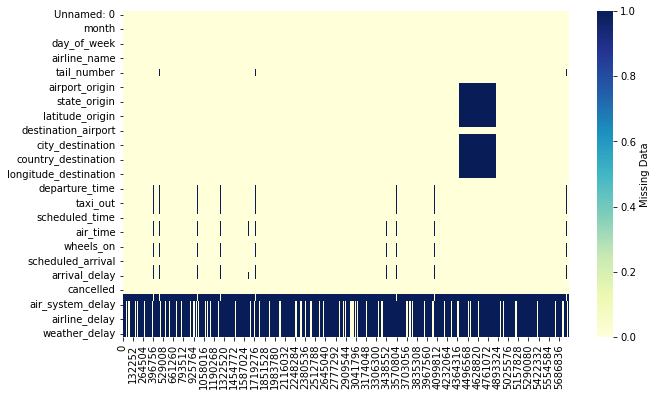

In [109]:
#plotting missing values
# code altered from: https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

Our team then examined a breakdown of these missing values and noticed that there was a pattern of missing values. In attributes that seem closely related, we see the same number of missing values repeated several times. An example of this is displayed 11 attributes down with “airport_origin” to “country_origin”; all included attributes have exactly 486,165 missing values. We suspected that some, if not all, of these missing values appear in the same rows and will thus cause minimal data loss when dropped. The results of this data loss will be slightly postponed as our team wished to do further analysis to save the salvageable rows

The attribute “cancellation_reason” is composed of the recorded reason for a flight's cancellation; the majority of our records were not cancelled and as such, there were no values in this attribute. From our research, we found that the attribute’s filled rows had one of the following entries: A for Airline/Carrier, B for Weather, C for National Air System, and D for Security. With this data understanding, we decided to impute a 5th option which filled the remaining rows with the value “NC”, representing not cancelled. 

In [ ]:
df.cancellation_reason = airline.cancellation_reason.fillna('NC') 

In [ ]:
delay_fillna = ['arrival_delay', 'departure_delay', 'air_system_delay', 'security_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'] 
df = df[delay_fillna].fillna(0)  

The last attributes our team addressed are the origin/destination, latitude, and longitude attributes. Our team thought that the missing values for these 2 attributes were particularly weird because of the relatively small difference between the null counts of latitude and longitude and the attribute range starting with “airport_origin”. After sorting the original airport data set by longitude ascending, we discovered that there are 3 airports with missing latitudes and longitudes. As there were only 3 missing coordinates our team found said coordinates, imputed them, and re-ran our merger.   

#### Code Originally Ran in merging files for missing Lat/Long Data for 3 missing airport coordinates:

### impute missing lat/long values from:https://www.airnav.com/airport/

#### ECP:
    lat:30.3582408
    long:-85.7956022
#### PGB
    lat:44.6509444
    long:-73.4681389
#### UST:
    lat:29.9592503
    long:-81.3397292

lat_inpute = {
    'ECP': 30.3582408,
    'PBG': 44.6509444,
    'UST': 29.9592503
}
long_inpute = {
    'ECP': -85.7956022,
    'PBG': -73.4681389,
    'UST': -81.3397292
}

#missing airport lat/long IATA CODE

missing_lat_long = ['ECP','PBG','UST']

df_airports['LATITUDE'].loc[df_airports['IATA_CODE'].isin(missing_lat_long)] = df_airports['IATA_CODE'].map(lat_inpute)
df_airports['LONGITUDE'].loc[df_airports['IATA_CODE'].isin(missing_lat_long)] = df_airports['IATA_CODE'].map(long_inpute)

### Remaining Missing Values
As for the remaining missing values we have decided to drop them. The remaining attributes are a combination of categorical, discrete, and 4 numerical attributes that we have decided are too heavily dependent on other attributes to fill in with a mean or median value. Any other numerical variaible with a missing value will later be imputed with a 0 to signify no delay for that variable.

Since several rows contain the same route information, because airlines have set routes/schedules, we have decided to regard any rows with similar data as a valid part of our data set.  

#### Duplicate records: 

In [115]:
df[df.duplicated()] 

,year,month,day,day_of_week,airline_cd,airline_name,flight_number,tail_number,origin_airport,airport_origin,city_origin,state_origin,country_origin,latitude_origin,longitude_origin,destination_airport,airport_destination,city_destination,state_destination,country_destination,latitude_destination,longitude_destination,scheduled_departure,departure_time,departure_delay,taxi_out,wheels_off,scheduled_time,elapsed_time,air_time,distance,wheels_on,taxi_in,scheduled_arrival,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay


#### Outliers

Our team has seen no evidence of outliers in our data set. All time and date-based attributes are within standard ranges and duration attributes are reasonable for the topic.  

# Simple Statistics

# Visualize Attributes

One of the attributes the team was interested in visualizing was the numeric response variable, “departure_delays.” The team wanted to look at the distribution of the variable to determine if it was uniform or not. To complete this, the team created a histogram for “departure_delays.” A histogram was chosen as an appropriate visualization as they visually communicate an attribute’s distribution.  

As evidence below, the distribution of “departure_delays” proved to be right skewed. Knowing that having skewed variables in a model negatively impacts results, (skewed variables don’t meet statistical assumptions for regression), the team log transformed “departure_delays” to see if the distribution was corrected. After log transforming the response, the variable’s distribution was uniform.  

#### Histogram of Departure Delays: Show Skewness

/Users/allen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

/Users/allen/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning:

invalid value encountered in log



<AxesSubplot:xlabel='departure_delay', ylabel='Count'>

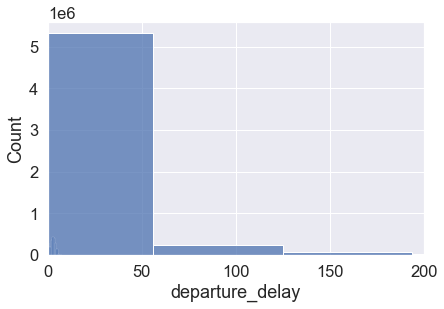

In [156]:
#Creating a histogram of the departure_delay variable. The variable is righr skewed. I will log the variable and view it's distribution to see if it normalizes.  
sns.histplot(data=df, x="departure_delay", bins=30) 
plt.xlim(0, 200) 

df_deep_delay = df.copy()
#Log transforming the departure delay variable. 
df_deep_delay['dep_delay_log'] = np.log(df['departure_delay']) 

#Distrbution of origin_airport variable.  
sns.histplot(df_deep_delay, x="dep_delay_log",bins=10) 

In [121]:
#creating a df for airlines and delay types 
airlinedelaytype = pd.DataFrame(df.groupby(['airline_name'])['air_system_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'].sum()).reset_index()

airlinedelaytype['total'] = airlinedelaytype['air_system_delay'] + airlinedelaytype['airline_delay'] + airlinedelaytype['late_aircraft_delay'] + airlinedelaytype['weather_delay'] 

airlinedelaytype['pcnt_late_aircraft_delay'] = (airlinedelaytype['late_aircraft_delay']/airlinedelaytype['total']) 

airlinedelaytype['pcnt_airline_delay'] = (airlinedelaytype['airline_delay']/airlinedelaytype['total']) 

airlinedelaytype['pcnt_air_system_delay'] = (airlinedelaytype['air_system_delay']/airlinedelaytype['total']) 

airlinedelaytype['pcnt_weather_delay'] = (airlinedelaytype['weather_delay']/airlinedelaytype['total']) 

#creating a df for months and delay types 
monthdelaytype = pd.DataFrame(df.groupby(['month'])['air_system_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'].sum()).reset_index() 

monthdelaytype ['total'] = monthdelaytype ['air_system_delay'] + monthdelaytype['airline_delay'] + monthdelaytype['late_aircraft_delay'] + monthdelaytype['weather_delay'] 

monthdelaytype ['pcnt_late_aircraft_delay'] = (monthdelaytype ['late_aircraft_delay']/monthdelaytype ['total']) 

monthdelaytype ['pcnt_airline_delay'] = (monthdelaytype['airline_delay']/monthdelaytype ['total']) 

monthdelaytype ['pcnt_air_system_delay'] = (monthdelaytype ['air_system_delay']/monthdelaytype ['total']) 

monthdelaytype ['pcnt_weather_delay'] = (monthdelaytype ['weather_delay']/monthdelaytype ['total']) 

/var/folders/cn/_lgzxbk177j14_b82nbl10br0000gn/T/ipykernel_15731/3972987142.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  airlinedelaytype = pd.DataFrame(df.groupby(['airline_name'])['air_system_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'].sum()).reset_index()
/var/folders/cn/_lgzxbk177j14_b82nbl10br0000gn/T/ipykernel_15731/3972987142.py:15: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthdelaytype = pd.DataFrame(df.groupby(['month'])['air_system_delay', 'airline_delay', 'late_aircraft_delay', 'weather_delay'].sum()).reset_index()


Text(0, 0.5, 'Airlines')

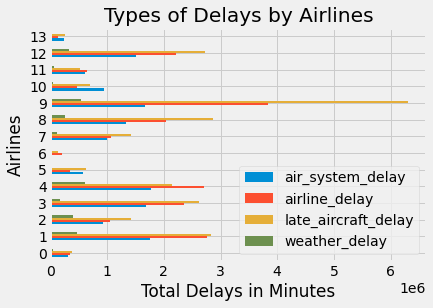

In [123]:
#plotting airlines against delay types 
airlinedelaytype1=airlinedelaytype[['airline_name','air_system_delay','airline_delay','late_aircraft_delay', 'weather_delay']].copy() 
plotdata=airlinedelaytype1 
mpl.style.use('fivethirtyeight')  
plotdata.plot(kind="barh") 
plt.title("Types of Delays by Airlines") 
plt.xlabel("Total Delays in Minutes") 
plt.ylabel("Airlines") 

Text(0, 0.5, 'Months')

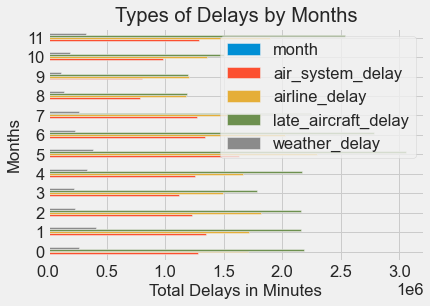

In [169]:
#Plotting Months Against Delay types 
monthdelaytype1=monthdelaytype[['month','air_system_delay','airline_delay','late_aircraft_delay', 'weather_delay']].copy() 
plotdata=monthdelaytype1 
mpl.style.use('fivethirtyeight')  
plotdata.plot(kind="barh") 
plt.title("Types of Delays by Months") 
plt.xlabel("Total Delays in Minutes") 
plt.ylabel("Months") 

#### Map of US Airports and Total Delay Counts

In [157]:
# create a function for delayed count for Map of US
def delayed_count(delay,axis=1):
    if delay <= 0:
        return 0
    else:
        return 1
    
# create a new column based on condition
df_delayed_cnt = df.copy()
df_delayed_cnt['Delayed_Count'] = df.loc[:,'departure_delay'].apply(delayed_count)

In [158]:
#create smaller data set for plotly
gb_cols = ['latitude_origin','longitude_origin','airport_origin']
df_plotly = pd.DataFrame(df_delayed_cnt.groupby(gb_cols).agg({'Delayed_Count': 'sum'})).reset_index()

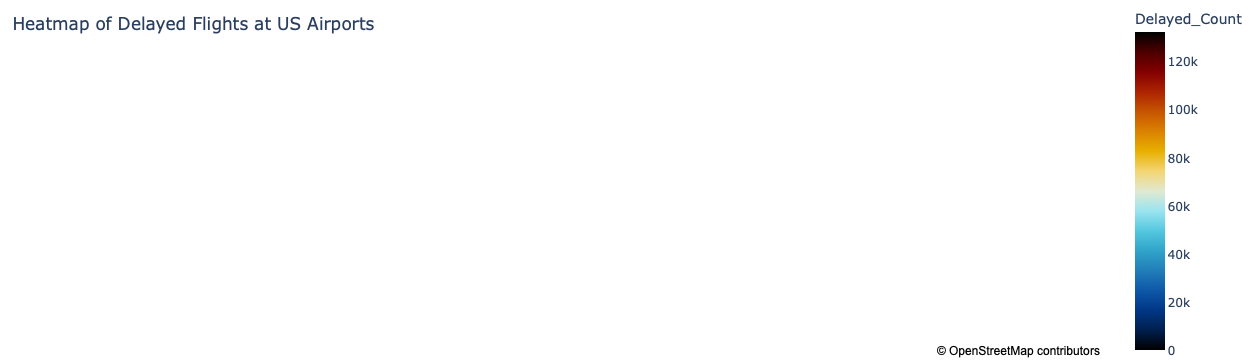

In [159]:
#code altered from https://stackoverflow.com/questions/45678022/build-interactive-map-from-python
fig = px.scatter_mapbox(df_plotly, 
                        lat="latitude_origin",
                        lon="longitude_origin",
                        color="Delayed_Count", 
                        size="Delayed_Count",
                        title = 'Heatmap of Delayed Flights at US Airports',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        hover_data={'airport_origin':True,
                                    'longitude_origin':True,
                                    'latitude_origin':True,
                                    'Delayed_Count':True},
                        zoom = 3)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    title_x=0.01,
    title_y=0.95,
    margin={"l": 0, "r": 0, "b": 0, "t": 0}
)


fig.show()

#### Combination Plot to show Skewness of Data

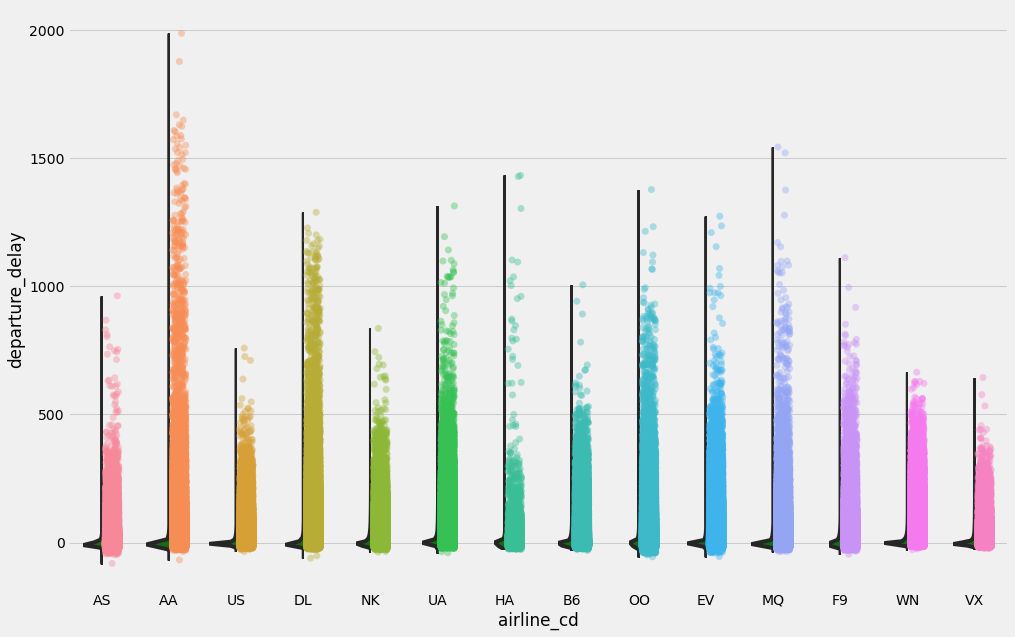

In [130]:
#adapted from online. Can't find website
plt.figure(figsize=(15, 10))
# Create violin plots without mini-boxplots inside.
ax = sns.violinplot(y='departure_delay',
                    x='airline_cd',
                    data=df,
                    color='green', 
                    cut=0,
                    inner=None)

# Clip the right half of each violin.
for item in ax.collections:
    x0, y0, width, height = item.get_paths()[0].get_extents().bounds
    item.set_clip_path(plt.Rectangle((x0, y0), width/2, height,
                       transform=ax.transData))

# Create strip plots with partially transparent points of different colors depending on the group.
num_items = len(ax.collections)
sns.stripplot(y='departure_delay',
              x='airline_cd',
              data=df,
              alpha=0.4,
              size=7)

# Shift each strip plot strictly below the correponding volin.
for item in ax.collections[num_items:]:
    item.set_offsets(item.get_offsets() + 0.15)


#plt.legend(frameon=False, fontsize=15, loc='upper left')

#### Heatmap Showing Average Time Differece between Departure Time and Actual Time for Airline at Airport

In [142]:
#Templated by https://www.kaggle.com/code/fabiendaniel/predicting-flight-delays-tutorial 
airport_mean_delays = pd.DataFrame(pd.Series(df['city_origin'].unique())) 
airport_mean_delays.set_index(0, drop = True, inplace = True) 
abbr_companies = df_airlines.set_index('IATA_CODE')['AIRLINE'].to_dict() 
identify_airport = df_airports.set_index('IATA_CODE')['CITY'].to_dict() 
  
# function that extract statistical parameters from a groupby object: 
def get_stats(group): 
    return {'min': group.min(), 'max': group.max(), 
            'count': group.count(), 'mean': group.mean()} 
  
for carrier in abbr_companies.keys(): 
    fg1 = df[df['airline_name'] == carrier] 
    test = fg1['departure_delay'].groupby(df['airline_name']).apply(get_stats).unstack() 
    airport_mean_delays[carrier] = test.loc[:, 'mean'] 

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

/Users/allen/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.

/Users/allen/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:305: UserWarning:

Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.



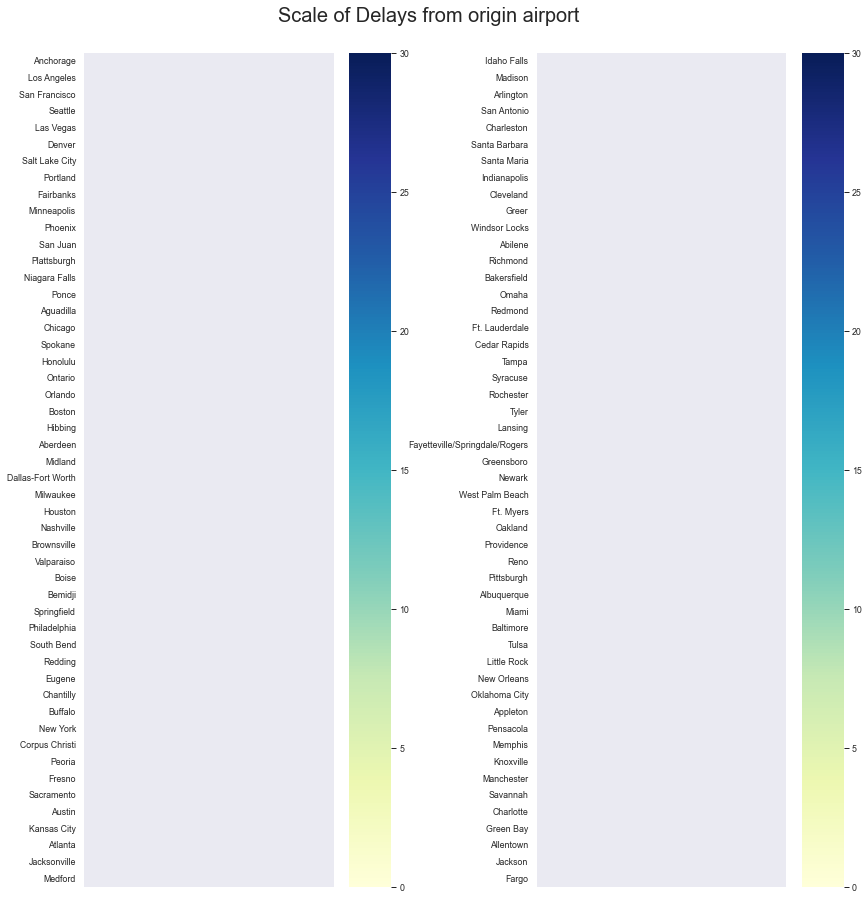

In [143]:
sns.set(context="paper") 
delayscale = plt.figure(1, figsize=(12,12)) 
  
ax = delayscale.add_subplot(1,2,1) 
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies) 
subset = subset.rename(index = identify_airport) 
mask = subset.isnull() 
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30) 
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ; 
ax.yaxis.label.set_visible(False) 
  
ax = delayscale.add_subplot(1,2,2)     
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies) 
subset = subset.rename(index = identify_airport) 
delayscale.text(0.5, 1.02, "Scale of Delays from origin airport", ha='center', fontsize = 20) 
mask = subset.isnull() 
sns.heatmap(subset, linewidths=0.05, cmap="YlGnBu", mask=mask, vmin = 0, vmax = 30) 
plt.setp(ax.get_xticklabels(), fontsize=12, rotation = 88) ; 
ax.yaxis.label.set_visible(False) 
plt.tight_layout() 

#### Bar Chart of Average MPH per Airline

We decided to explore a potential variable that could help mitigate an arrival delay, plane speed. The idea is that departure delay stops cumulating when the plane is in the air and arrival delays will start cumulating until the plane lands. Our assumption is each airline travels at a different speed due to factors like plane models, maintenance practices and weather. Since arrival time is redetermined, if a plane arrives early it is essentially mitigating minutes of delay by minimize air_time through plane speed. So it would be possible to have a departure delay but still arrive on time. 

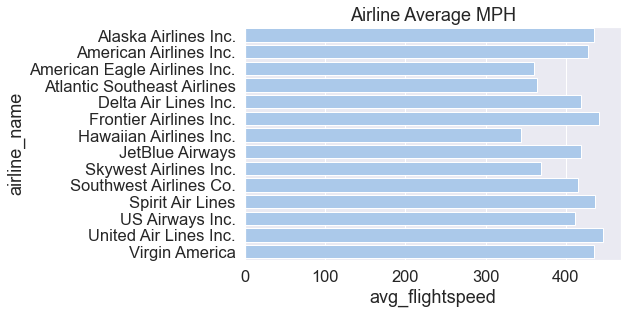

In [147]:
#establish airline flight speed
df_fs['flightspeed'] = 60*df["distance"]/df["air_time"]

#setting airline mean speed 
airlinespeed = pd.DataFrame({'avg_flightspeed' : df_fs.groupby(['airline_name'])['flightspeed'].mean()}).reset_index() 
 
#Visualize average speed of each airline 
ax = sns.set_color_codes("pastel") 
sns.set_context("notebook", font_scale=1.5) 
ax = sns.barplot(x="avg_flightspeed", y="airline_name", data=airlinespeed, 
            label="accuracy", color="b").set(title='Airline Average MPH') 

# Explore Joint Attributes

An important consideration the team wanted to evaluate was correlations amongst numeric attributes. To analyze this, the team created a correlation plot of the numeric columns. This plot is helpful to the team as it identifies attributes that have high correlations with each other and it helps the team decide which attributes can be removed from the data set. 

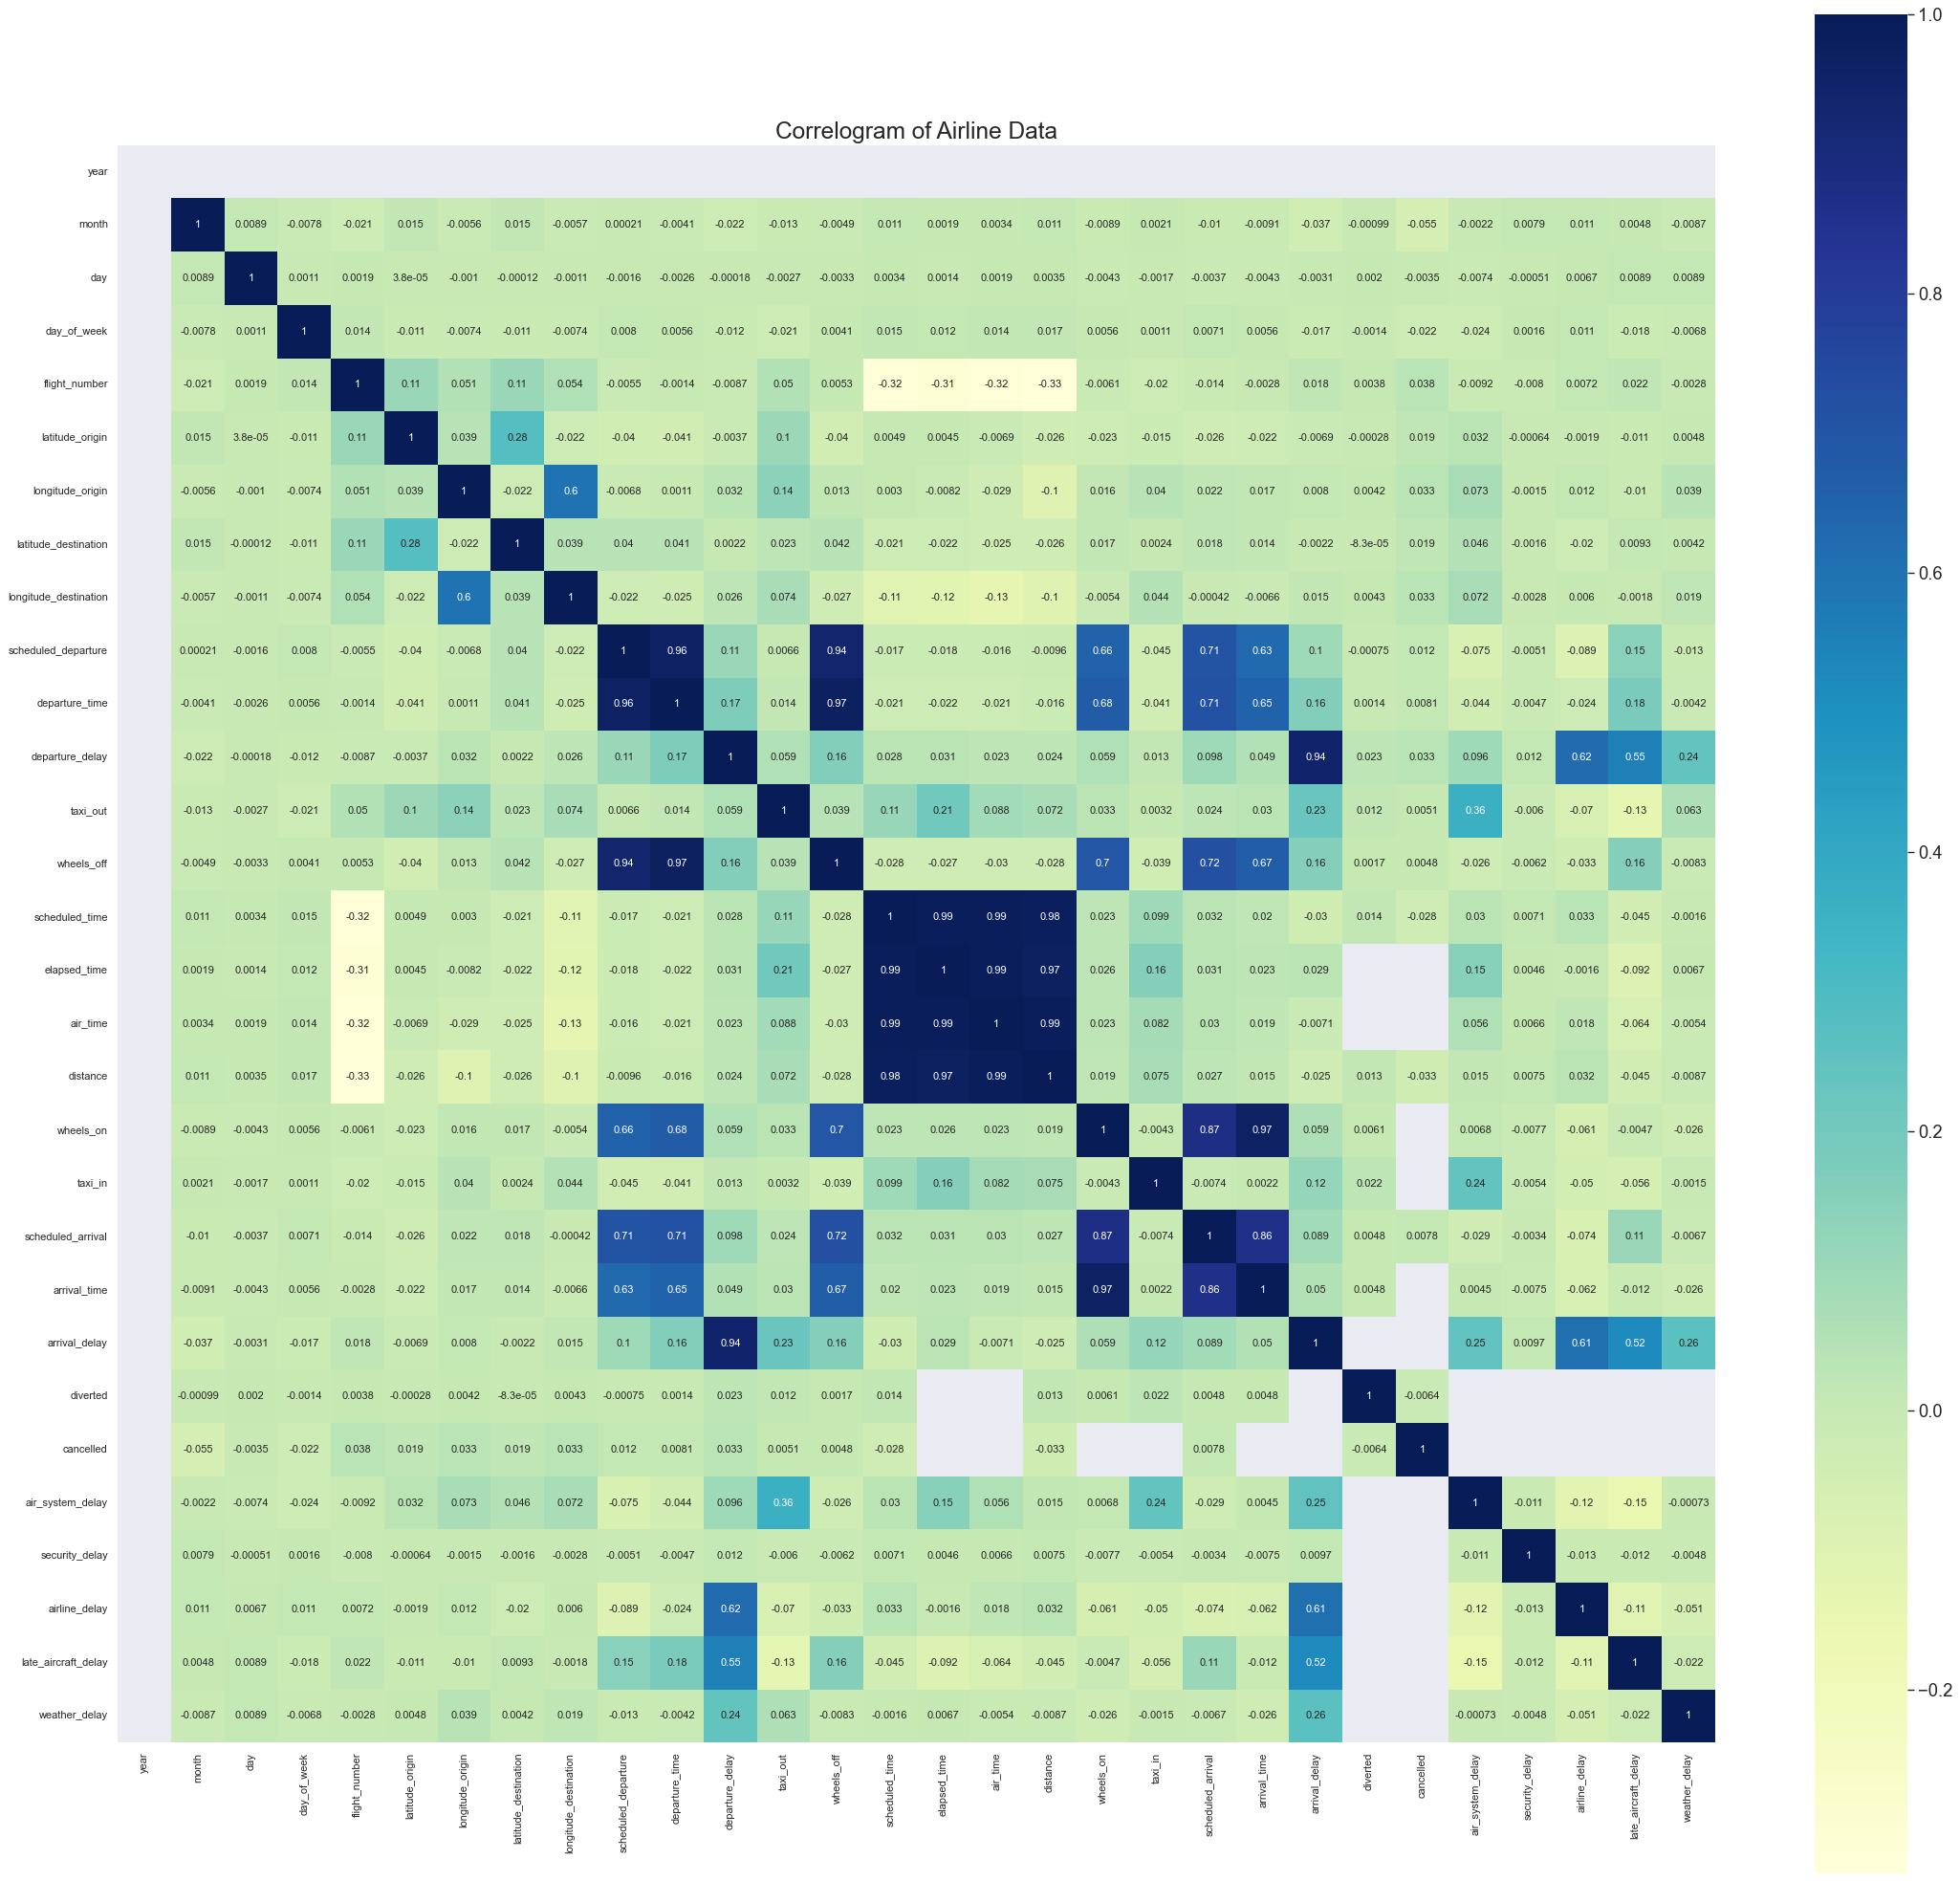

In [167]:
# plotting Correlogram of numerical columns
plt.figure(figsize=(30,30), dpi= 80)
sns.heatmap(df.corr(),
            xticklabels=df.corr().columns,
            yticklabels=df.corr().columns,
            cmap = "YlGnBu",
            square = True,
            annot=True,
            annot_kws={"size":10}
           )

# addting titles and font sizes
plt.title('Correlogram of Airline Data', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

Several takeaways from the correlation plot include: 

#### 1. There are 7 attributes with a correlation of .99 
#### 2. There are 18 attributes with a correlation > .95 
#### 3. There are 22 attributes with a correlation > .90 

An interesting takeaway from the correlation plot is that there are a lot of highly correlated variables in our data set. Given that our data set contains over five million records, this is to be expected, however, it was nonetheless interesting to see. What the correlation plot tells us about the relationships between our variables is that many of them are dependent upon one another. It is important that the team identify these dependencies and address them before building a final model. 

After evaluating the correlation plot, the team decided to remove all columns with a correlation > .90. A cutoff of .90 was decided as 22 attributes fall under that classification. Additionally, removal of these columns improves model performance.

In [ ]:
#dropping highly correlated columns
#https://www.codegrepper.com/code-examples/python/how+to+drop+highly+correlated+features
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

df = df.drop(columns =to_drop, axis=1)

We wanted to visualize the delay types as it makes sense they would directly influence if a flight was delayed (departure_delay or arrival_delay >0). We wanted to explore our first assumptions that airlines and months would play a significant role in delays. 

We plotted the summed total of each delay type against the airlines and months. 

Text(0, 0.5, 'Airlines')

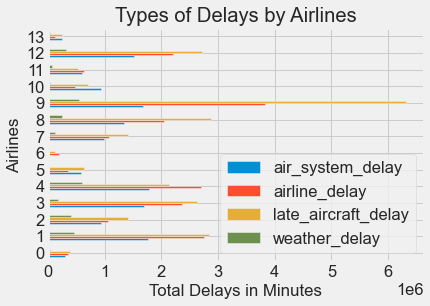

In [168]:
#plotting airlines against delay types 
airlinedelaytype1=airlinedelaytype[['airline_name','air_system_delay','airline_delay','late_aircraft_delay', 'weather_delay']].copy() 
plotdata=airlinedelaytype1 
mpl.style.use('fivethirtyeight')  
plotdata.plot(kind="barh") 
plt.title("Types of Delays by Airlines") 
plt.xlabel("Total Delays in Minutes") 
plt.ylabel("Airlines") 

Text(0, 0.5, 'Months')

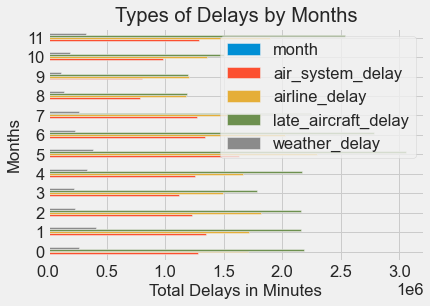

In [170]:
#Plotting Months Against Delay types 
monthdelaytype1=monthdelaytype[['month','air_system_delay','airline_delay','late_aircraft_delay', 'weather_delay']].copy() 
plotdata=monthdelaytype1 
mpl.style.use('fivethirtyeight')  
plotdata.plot(kind="barh") 
plt.title("Types of Delays by Months") 
plt.xlabel("Total Delays in Minutes") 
plt.ylabel("Months") 

# Explore Attributes and Classes

After exploring joint relationships in the data set, the team evaluated relationships between attributes and the response variable, (departure_delay). The intent behind this analysis was to identify what attributes are significant at predicting departure delays.  

To identify relationships between attributes and the response, the team created box plot visualizations. Box plot visualizations were chosen as they are effective at visualizing relationships between categorical and numeric attributes. Additionally, because box plots show the distribution of attributes, they are effective at identifying relationships. 

Each box plot contains the log of the response variable on the y-axis and the attribute that is being visualized on the x-axis. A log of “departure_delay” was used as the response was found to be right skewed. After log transforming “departure_delay,” the distribution of the variable was uniform and suitable for analysis.

The first relationship the team explored was between the variables: “airline” and “dep_delay_log.” From the box plot we see that there is not a strong relationship between the two variables. The team arrived at this conclusion because the mean value of each airline is not increasing as dep_delay_log increases. Conversely, the mean of each airline is not decreasing as dep_delay_log decreases. From an EDA perspective this indicates that the airline variable is not significant at predicting our response and it can be removed from our data set. Removal of this attribute is something the team will consider in upcoming labs.  

Text(0, 0.5, 'Log Delayed Departure')

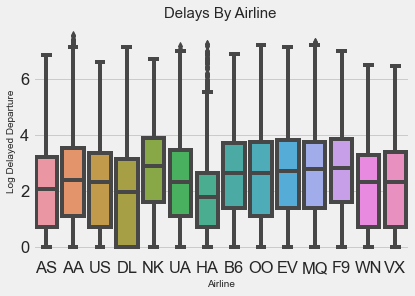

In [174]:
#airline and log_departure_delay boxplot 
sns.boxplot(x = 'airline_cd', y = 'dep_delay_log', data = df_deep_delay) 
plt.title('Delays By Airline', fontsize=15) 
plt.xlabel('Airline', fontsize=10) 
plt.ylabel('Log Delayed Departure', fontsize=10) 

The second relationship the team explored was between the variables: “state_origin” and “dep_delay_log.” Given that there is no positive or negative correlation between the two variables shown, the team concluded that the “state_origin” variable is not significant at predicting the response. Removing this variable will be considered in upcoming labs

[Text(0, 0, 'AK'),
 Text(1, 0, 'CA'),
 Text(2, 0, 'WA'),
 Text(3, 0, 'NV'),
 Text(4, 0, 'CO'),
 Text(5, 0, 'UT'),
 Text(6, 0, 'OR'),
 Text(7, 0, 'MN'),
 Text(8, 0, 'AZ'),
 Text(9, 0, 'PR'),
 Text(10, 0, 'NY'),
 Text(11, 0, 'IL'),
 Text(12, 0, 'HI'),
 Text(13, 0, 'FL'),
 Text(14, 0, 'MA'),
 Text(15, 0, 'SD'),
 Text(16, 0, 'TX'),
 Text(17, 0, 'WI'),
 Text(18, 0, 'TN'),
 Text(19, 0, 'ID'),
 Text(20, 0, 'MO'),
 Text(21, 0, 'PA'),
 Text(22, 0, 'IN'),
 Text(23, 0, 'VA'),
 Text(24, 0, 'ME'),
 Text(25, 0, 'GA'),
 Text(26, 0, 'SC'),
 Text(27, 0, 'OH'),
 Text(28, 0, 'CT'),
 Text(29, 0, 'NE'),
 Text(30, 0, 'IA'),
 Text(31, 0, 'MI'),
 Text(32, 0, 'AR'),
 Text(33, 0, 'NC'),
 Text(34, 0, 'NJ'),
 Text(35, 0, 'RI'),
 Text(36, 0, 'NM'),
 Text(37, 0, 'MD'),
 Text(38, 0, 'OK'),
 Text(39, 0, 'LA'),
 Text(40, 0, 'NH'),
 Text(41, 0, 'MS'),
 Text(42, 0, 'ND'),
 Text(43, 0, 'KY'),
 Text(44, 0, 'MT'),
 Text(45, 0, 'KS'),
 Text(46, 0, 'AL'),
 Text(47, 0, 'WY'),
 Text(48, 0, 'VT'),
 Text(49, 0, 'GU'),
 Text(50, 

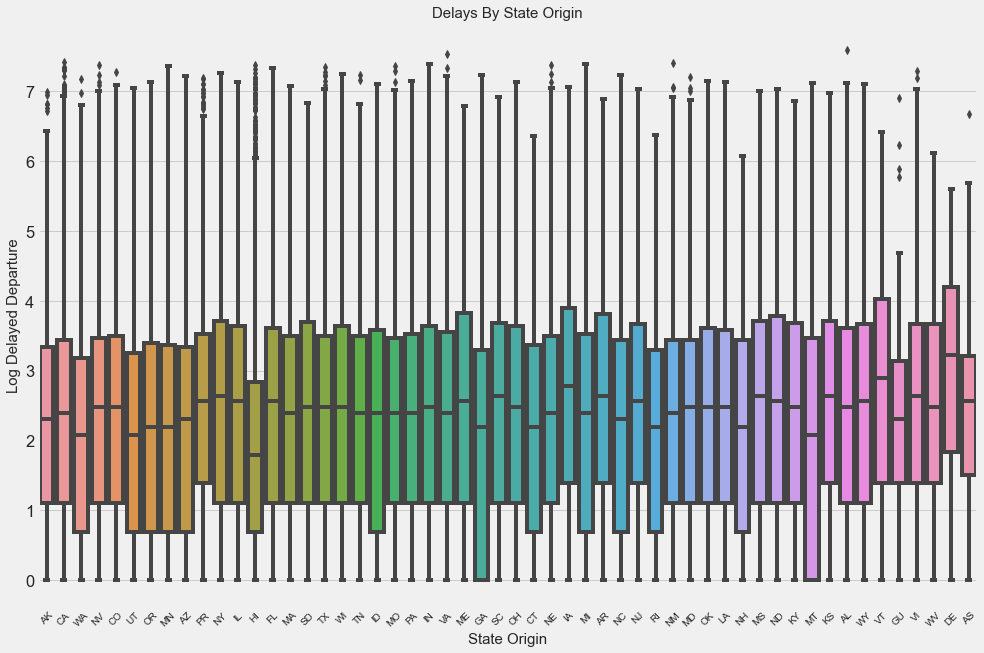

In [175]:
# state_origin by dep_delay_log box plot 
plt.figure(figsize=(15,10)) 
plot = sns.boxplot(x = 'state_origin', y = 'dep_delay_log',data = df_deep_delay) 
plt.title('Delays By State Origin', fontsize=15) 
plt.xlabel('State Origin', fontsize=15) 
plt.ylabel('Log Delayed Departure', fontsize=15) 
plot.set_xticklabels(plot.get_xmajorticklabels(), fontsize = 10, rotation=45) 

Next, the team evaluated the relationship between the variables: “desintation_state” and “dep_delay_log.” Subtle variation is shown amongst the means of each state and “log_departure_delay”, however since the variation is not significant enough at producing an increasing or decreasing trend with the response, the team deemed the variable as not significant.   

Text(0, 0.5, 'Log Delayed Departure')

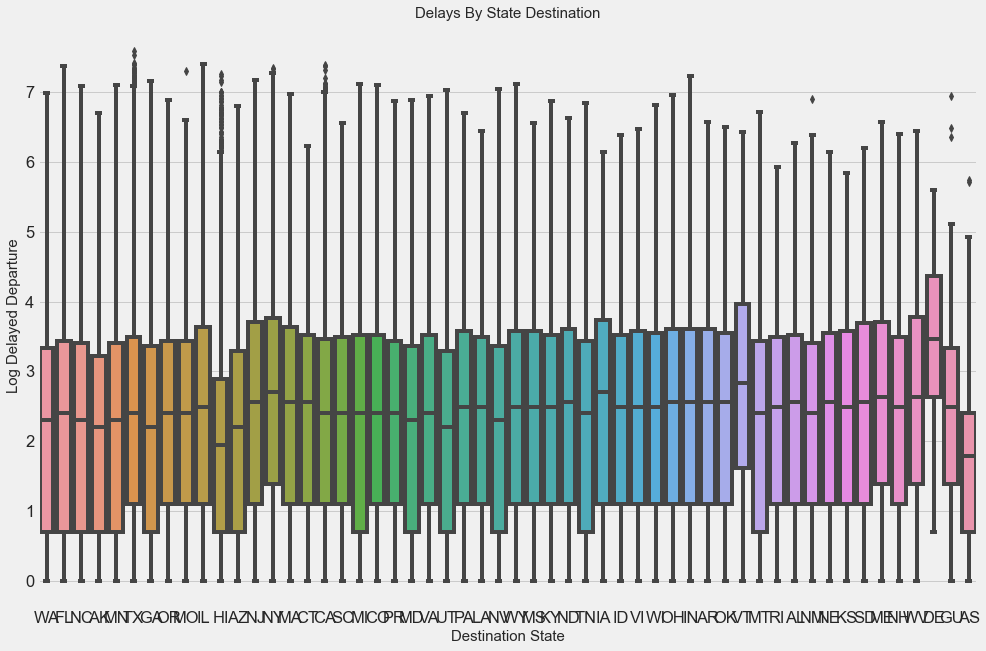

In [176]:
#Boxplot of Delays by State Destination.  
plt.figure(figsize=(15,10)) 
plot = sns.boxplot(x = 'state_destination',y = 'dep_delay_log', data = df_deep_delay) 
plt.title('Delays By State Destination', fontsize=15) 
plt.xlabel('Destination State', fontsize=15) 
plt.ylabel('Log Delayed Departure', fontsize=15) 

The fourth relationship examined was between the variables: “day_of_week” and “dep_delay_log.” The variable “day_of_week” was selected as the team initially hypothesized that there would be a relationship between it and the response. Upon creating the visualization, the team’s hypothesis was debunked. There are no positive or negative correlations between the “day_of_week” variable and “dep_delay_log.” This indicates that day of the week is not a significant predictor to include in future models.  

Text(0, 0.5, 'Log Delayed Departure')

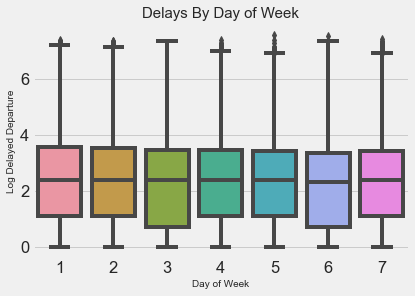

In [180]:
#Boxplot for departure delays by day of week.  
sns.boxplot(x="day_of_week",y = 'dep_delay_log', data = df_deep_delay) 
plt.title('Delays By Day of Week', fontsize=15) 
plt.xlabel('Day of Week', fontsize=10) 
plt.ylabel('Log Delayed Departure', fontsize=10) 

The last relationship the team examined was between the variables: “month” and “dep_delay_log.” The boxplot showed no strong positive or negative correlations between the two variables. Therefore, the month variable was determined to be a insignificant predictor for our response.  

Text(0, 0.5, 'Log Delayed Departure')

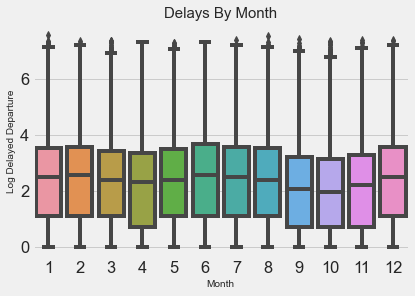

In [183]:
#Boxplot for departure delays by month.  
sns.boxplot(x="month",  y = 'dep_delay_log', data = df_deep_delay) 
plt.title('Delays By Month', fontsize=15) 
plt.xlabel('Month', fontsize=10) 
plt.ylabel('Log Delayed Departure', fontsize=10) 

### INSERT SCALE OF DELAYS BY MONTH --- FIDEL

# New Features

| # | Feature Addition | Description | Use Case |
| :--- | :--- | :--- |:--- |
| 1 | Aircraft Model | Plane Models  | This could be used to better understand flight efficiency based on age of and plane sophistication |
| 2 | Maintenance History | Last maintenance check, frequency of tune ups, number of major overhauls | Maintenance history could help determine how fast a plane gets in the air, the speeds it can reach and the turn around from one flight to another |
| 3 | Customer Satisfaction Score | We imagine a survey score on different categories like comfort, entertainment, etc | Customer satisfaction scores could be used to target high priority issues the resolve. An example would be If customers rated the flight with a low timeliness score, turn-around procedures would be identified and reviewed |
| 4 | Pilot Years of Experience | Measured in years or months,  could be categorized by position title  | Our assumption is pilot years of experience may influence how long it takes to get planes off the ground and how they handle weather or flight routes |
| 5 | Flight Costs | Measured in Dollars | This could be a measure for airlines that have little to no delay. Our assumption is punctuality and timeliness could influence consumer trust in an airline, the higher the demand would then in turn result in a higher price. Finding that influences flight costs may be correlated with flight efficiency |
| 6 | Flight Weight | Numeric: in lbs or kg  | Our assumption is a heavier plane takes longer to load and could influence the flight speed which would influence departure and arrival delays  |

# Exceptional Work

For our exceptional work section, we decided to run a baseline logistic regression model so that we can compare a base model to a more complex model in the future such as XGBoost or LightGBM

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import sklearn as skl
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.pipeline import Pipeline

Since the data set is quite large and personal laptops will struggle to churn through the amount of rows and columns, we decided to filter down the data to Dallas-Fort Worth International Airport. This decreased the data frame size from almost 6 million rows to just under 240k rows and also helped with the one hot encoding below.

In [ ]:
airports = ['DFW']

In [ ]:
df_air = df.loc[df['origin_airport'].isin(airports)]

In [ ]:
#selecting columns that are dtype != numeric
non_numeric = df_air.select_dtypes(exclude = np.number).columns

Because we want to predict if an airplane is going to be delayed or not using logistic regression, we created a new field called "is_delay" from the "departure_delay" field. To do this, we created a function that we could pass a numeric field through and if the value for that row is greater than 0, we imputed "1" into the curated field to signifiy the flight was delayed. If the value was less than 0, we imputed "0" to signify that the flight was not delayed. 

In [ ]:
#create binary response for logistic regression
# create a function
def is_delayed(delay,axis=1):
    if delay <= 0:
        return 0
    else:
        return 1
    
# create a new column based on condition
df_air['is_delay'] = df_air.loc[:,'departure_delay'].apply(is_delayed)

After creating the "is_delay" field, we then began to One Hot Encode any categorial variables so that our model could interpret and use those columns. This caused a 250k by 42 data set to become 240k by 3400. 

In [ ]:
#Departure Delay - response
#altered from https://www.statology.org/one-hot-encoding-in-python/

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on non-numeric column s
encoder_df = pd.DataFrame(encoder.fit_transform(df_air[non_numeric]).toarray())

#return column names from encoder
encoder_df.columns = encoder.get_feature_names_out()

#merge one-hot encoded columns back with original DataFrame
encoded = df_air.join(encoder_df)

In [ ]:
#drop original columns
final_df = encoded.drop(non_numeric, axis=1)

Once the target variable was created and we one hot encoded the data set, we were able to begin modeling our data. To start, we separated the features with the target varibale as to not leave the response in a test or train data set.

In [ ]:
feature_cols = final_df.loc[:, final_df.columns != 'is_delay'].columns
X = final_df[feature_cols] # Features
y = final_df.is_delay # Target variable

From sklearn, we used their train_test_split package to create a 75/25 train and test split for our model.

In [ ]:
#split dataset in features and target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

After one hot encoding, for our logistic regession model to run, we imputed the NaN values with 0.

In [ ]:
#imputing 0 into NaN values for logistic regression after OHE
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
y_train = y_train.fillna(0)
y_test = y_test.fillna(0)

In [ ]:
#checking shape of data
print('X_train shape: ',X_train.shape,'\n')
print('X_test shape: ',X_test.shape,'\n')
print('y_train shape: ',y_train.shape,'\n')
print('y_test shape: ',y_test.shape)

To simplify the code and useability of the model, we used a pipeline function from sklearn to standardize (using StandarScaler), run the data through PCA and then finally a logistic regession model using the PCA output. 

In [ ]:
#https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

tolerance = 0.1
l1ratio = 1
rs = 0

# Scale -> PCA -> LR 
logistic = LogisticRegression(solver = 'saga',
                                random_state = rs,
                                penalty ='elasticnet',
                                l1_ratio = l1ratio,
                                tol = tolerance)

pipe = Pipeline(steps=[("scaler", scaler),
                       ("pca", pca),
                       ("logistic", logistic)]
               )

pipe.fit(X_train,y_train)

In [ ]:
#predict
y_pred=pipe.predict(X_test)

After creating predictions on our test data set, we pulled metrics to determine how well our model performed. Our base model had an accuracy of 78.31% with a precision of 95.99% and a recall of 51.54%. This model output gives us a good starting point for hypertuing the model and comparison against some more powerful models such as XGBoost or LightGBM. After computing these metrics we then created a confusion matrix heatmap to better visualize how well our model was predicting and where the model could perform better with False Positives and False Negatives.

In [ ]:
#Metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

In [ ]:
#correlation Matrix Heatmap
# code from: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

Finally we chose to plot a ROC curve to visualize specificity and sensitiviy of our model and determine model performance.

In [ ]:
#ROC Curve
y_pred_proba = pipe.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Base Logistic Regression, auc= "+str(auc))
plt.legend(loc=4)
plt.show()